In [1]:
import tensorflow as tf
import glob
import utils
import metrics
import numpy as np

In [2]:
X_train, X_test, y_train, y_test = utils.load_data() # might need to ensure test and train data is the same as it was at model generation...
files = glob.glob("../simple_grid_1/saved_models/**/epoch=*/", recursive=True)
files[0]
model = tf.keras.models.load_model(files[0])

In [3]:
from matplotlib import pyplot as plt

In [10]:
metrics.sparcity(model)

{'nnz_weights': [88, 121, 121, 121, 121, 121, 121, 11],
 'total_weights': [88, 121, 121, 121, 121, 121, 121, 11],
 'nnz_biases': [10, 8, 9, 9, 11, 11, 10, 1],
 'total_biases': [11, 11, 11, 11, 11, 11, 11, 1]}

In [11]:
metrics.basic_statistics(model)

{'weight_avg': [0.047956373542547226,
  0.017790518701076508,
  0.027182795107364655,
  -0.049691736698150635,
  -0.0727914348244667,
  0.15290148556232452,
  0.042603012174367905,
  0.12555161118507385],
 'bias_avg': [0.048146918416023254,
  0.007390916813164949,
  -0.013868069276213646,
  -0.0009387347381561995,
  0.04397105798125267,
  0.02385091595351696,
  0.04198937490582466,
  0.06657115370035172]}

Text(0.5, 1.0, 'MAE')

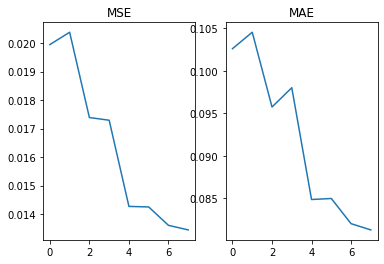

In [18]:
linear_probes = metrics.linear_probes(model, X_test, y_test)
plt.subplot(1,2,1)
plt.plot(linear_probes['mse'])
plt.title("MSE")
plt.subplot(1,2,2)
plt.plot(linear_probes['mae'])
plt.title("MAE")

Text(0.5, 1.0, 'Explained Variance')

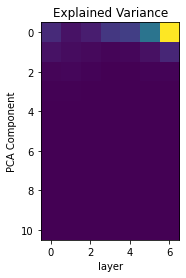

In [36]:
exp = metrics.layerwise_pca(model, X_test, y_test)['explained_variance']
plt.imshow(np.stack(exp[:-1]).T)
plt.ylabel("PCA Component")
plt.xlabel("layer")
plt.title("Explained Variance")

Text(0.5, 1.0, 'metrics.cka')

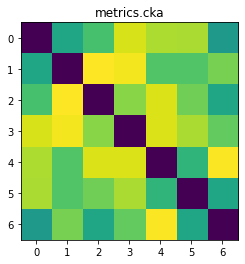

In [9]:
plt.imshow(metrics.linear_cka(model, X_test, y_test))
plt.title("metrics.cka")

Text(0.5, 1.0, 'metrics.cca')

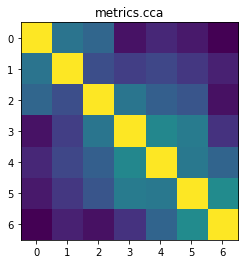

In [8]:
plt.imshow(metrics.cca(model, X_test, y_test))
plt.title("metrics.cca")